## <span style="font-family:Palatino Linotype"><font color='teal'>Correlations on Ads Spending and Sales</font>
### <span style="font-family:Palatino Linotype"><font color='teal'>Paolo G. Hilado</font></span> 

<span><font color='steelblue'>Situationer:</font></span>  The company wishes to explore whether spending on advertisements via the radio is likely to increase sales. As such, data has been collected across different branches that had budget for radio advertisements together with their respective sales for the period. This project will explore whether a significat relationship exists between aforesaid variables.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_excel("RadioAds.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  113 non-null    int64  
 1   RAspend     110 non-null    float64
 2   Sales       110 non-null    float64
 3   UnitID      113 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.7 KB


In [6]:
# let us check for rows with missing cases
df[df.isnull().any(axis=1)]

,Unnamed: 0,RAspend,Sales,UnitID
11,12,NaN,NaN,1153
19,20,NaN,NaN,1161
25,26,NaN,NaN,1167


In [11]:
# Drop rows with missing cases for both variables; remove columns that are not needed
df = df.dropna()
df = df.iloc[:, 1:3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 112
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RAspend  110 non-null    float64
 1   Sales    110 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


In [20]:
# Check whether distributions from the variables are approximately normal
ad = df.apply(scs.anderson, axis = 0)
print("Ads Spending p-value:", ad.iloc[1,0][2])
print("Sales p-value:", ad.iloc[1,1][2])

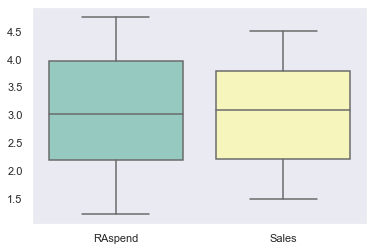

In [25]:
# Check visualizations if the distributions are approximately normal
sns.set_theme(style = "dark")
ax = sns.boxplot(data = df, palette = "Set3")

QQ-plot of Variable Radio Ads Spending


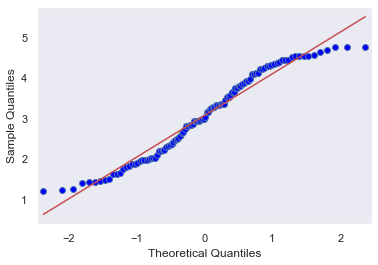

In [28]:
# Let us check the qq-plots for variable Radio Ads Spending
print("QQ-plot of Variable Radio Ads Spending")
sm.qqplot(df['RAspend'], line ='s'); 

QQ-plot of Variable Sales


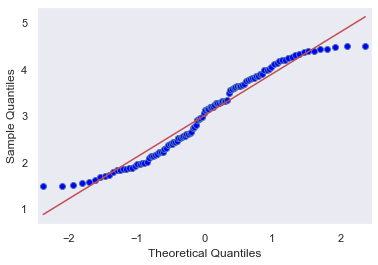

In [29]:
# Let us check the qq-plots for variable Sales
print("QQ-plot of Variable Sales")
sm.qqplot(df['Sales'], line ='s'); 

In [33]:
# Considering that the distributions seem to be approximately normal
# We will consider a parametrics approach for correlations
corr = scs.pearsonr(df['RAspend'], df['Sales'])
print("Pearson r:", np.round(corr[0],2), "r-squared:", np.round(corr[0]**2,2), "p-value:", np.round(corr[1],2))

Pearson r: 0.13 r-squared: 0.02 p-value: 0.19


<span><font color='steelblue'>Result:</font></span> 
A correlation analysis was conducted between the variables Radio Ads Spending and Sales. It can be observed that there is no significant relationship between aforesaid variables (p >0.05). As such, it can be said that patterns observed may simply be attributed by chance and that it may not necessarily reflect that of the population. 